# Diabetes Prediction using Support Vector Machine (SVM)

This notebook walks through the process of building a machine learning model that predicts diabetes using health-related features from the Pima Indians Diabetes dataset.


#### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#### Loading the dataset

In [ ]:
diabetes_ds = pd.read_csv("diabetes.csv")
diabetes_ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Explore the dataset


In [ ]:
# dataset shape
diabetes_ds.shape

(768, 9)

In [ ]:
# dataset information
diabetes_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# dataset description
diabetes_ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# distribution of target variable
diabetes_ds['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

- 0 --> Non-Diabetic
- 1 --> Diabetic

In [7]:
diabetes_ds.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


CORRELATION

In [8]:
correlation = diabetes_ds.corr()

<Axes: >

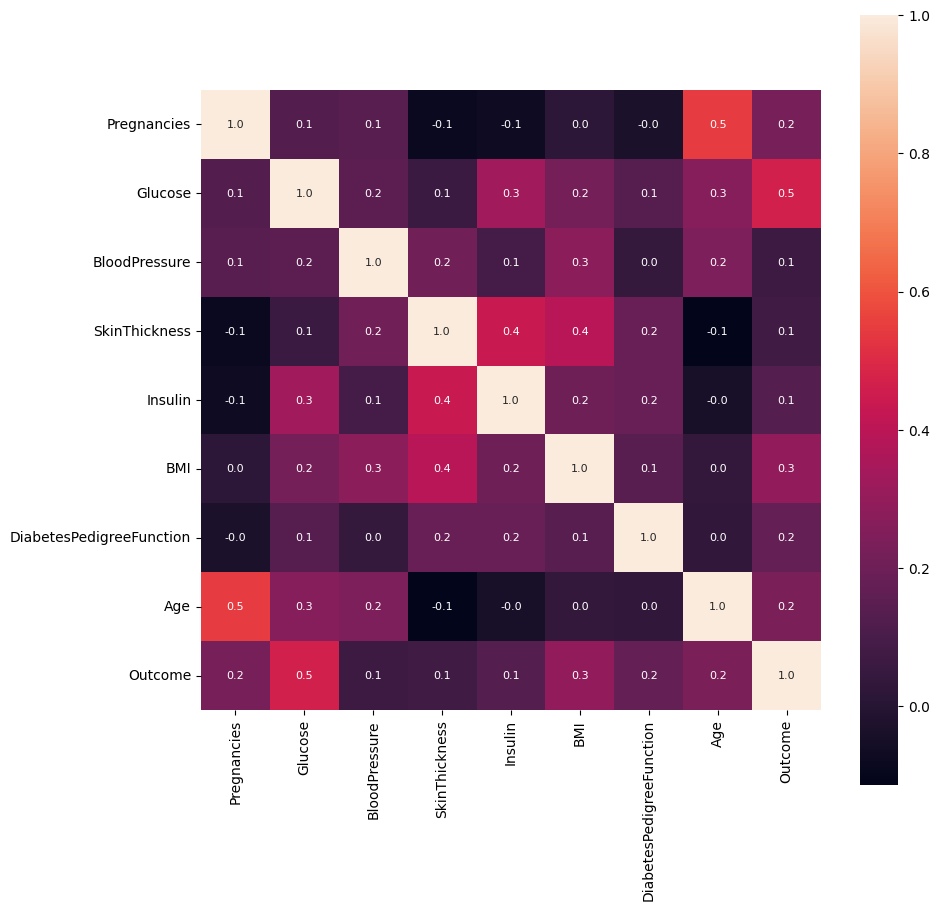

In [57]:
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, 
            annot_kws={'size':8}, cmap = 'rocket')

#### Split data into features (X) and target (y)

In [10]:
X = diabetes_ds.drop(columns = 'Outcome', axis = 1)
y = diabetes_ds['Outcome']

In [11]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [12]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#### Data Standardization

In [13]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:

scaled_X = scaler.transform(X)
X = scaled_X

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#### Train-Test Split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 5)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


#### Train the SVM model

In [ ]:
# initializing the model
classifier = svm.SVC(kernel ='linear')

In [ ]:
# fitting (training) the model
classifier.fit(X_train, y_train)

SVC(kernel='linear')

#### Model Evaluation

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Training Data Accuracy: ', training_data_accuracy)

In [ ]:
y_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy: ', test_accuracy)

In [ ]:
cl = classification_report(y_test, y_pred)
print(cl)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



#### Save the model & Scaler

In [35]:
import pickle
# Save the model to disk
pickle.dump(classifier, open('diabetes_model.pkl', 'wb'))
# Save the scaler to disk
pickle.dump(scaler, open('diabetes_scaler.pkl', 'wb'))

In [ ]:
aaa

## Predicting with saved model

In [ ]:
model = pickle.load(open('diabetes_model.pkl', 'rb'))
scaler = pickle.load(open('diabetes_scaler.pkl', 'rb'))
# Get column names from the original dataset
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Convert input data to a DataFrame with same column names
input_df = pd.DataFrame([input_data], columns=feature_names)

# Now transform it
std_data = scaler.transform(input_df)

# Predict
prediction = model.predict(std_data)

# Interpret result
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')